In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
lr = pd.read_csv('data/kc_house_data_cleaned.csv')

In [3]:
lr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,2,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,2,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,4,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,2,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,2,8,1530,0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,400000.0,4,2.50,2310,5813,2.0,0,0,2,8,2310,0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,402101.0,2,0.75,1020,1350,2.0,0,0,2,7,1020,0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,400000.0,3,2.50,1600,2388,2.0,0,0,2,8,1600,0,2004,0.0,98027,47.5345,-122.069,1410,1287


Defining the model variable

In [9]:
col_selectors = ['bedrooms','view','bathrooms','sqft_living','grade']
x = lr[col_selectors]
y= lr['price']

In [10]:
import statsmodels.api as sm
X_aug = sm.add_constant(x)
res = sm.OLS(y, X_aug).fit()

In [11]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     5913.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        11:54:49   Log-Likelihood:            -2.9808e+05
No. Observations:               21597   AIC:                         5.962e+05
Df Residuals:                   21591   BIC:                         5.962e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -4.46e+05   1.45e+04    -30.687      0.000   -4.74e+05   -4.18e+05
bedrooms    -3.448e+04   2316.707    -14.884      0.000    -3.9e+04   -2.99e+04
view         9.248e+04   2230.779     41.457      0.000    8.81e+04    9.69e+04
bathrooms   -2.098e+04   3365.149     -6.236      0.000   -2.76e+04   -1.44e+04
sqft_living   203.1311      3.533     57.502      0.000     196.207     210.055
grade        9.178e+04   2239.821     40.976      0.000    8.74e+04    9.62e+04
==============================================================================
Omnibus:                    16212.209   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           979711.801
Skew:                           3.064   Prob(JB):                         0.00
Kurtosis:                      35.422   Cond. No.                     2.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Defining the training model

In [12]:
lr_model = LinearRegression()
lr_model

LinearRegression()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [14]:
print(len(X_train))
print(len(X_test))

15117
6480


In [15]:
lr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
lr_model.coef_

array([-38523.69871454,  92408.52664224, -21261.62263546,    215.96105282,
        87586.38757781])

In [17]:
lr_model.score(X_train, y_train)

0.5856179220112949

Testing the model

In [18]:
lr_model.score(X_test, y_test)

0.5553490901420621

In [19]:
# This gets the predictions of model on test set.
y_pred = lr_model.predict(X_test)
#get first ten elements of prediction.
y_pred[0:10]

array([ 325030.71736754,  450675.95932013,  734031.08003847,
        842418.14058052,  852569.299412  , 1198447.69017083,
       1034349.60695118,  522253.85701928,  564670.47297472,
        421452.40467435])

/Users/karankurdia/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


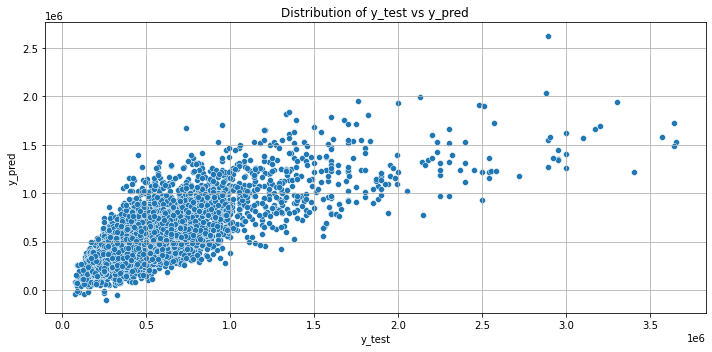

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(y_test, y_pred)
plt.rcParams.update({'font.size':10})
ax.set_xlabel('y_test')
ax.set_ylabel("y_pred")
ax.set_title('Distribution of y_test vs y_pred')
plt.grid()
plt.tight_layout()
plt.show();

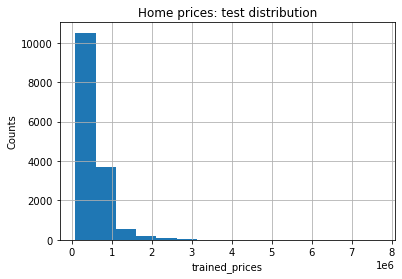

In [23]:

fig, ax = plt.subplots()
y_train.hist(bins = 15, ax = ax)
ax.set_xlabel('trained_prices')
ax.set_ylabel('Counts')
ax.set_title('Home prices: test distribution')
plt.show()

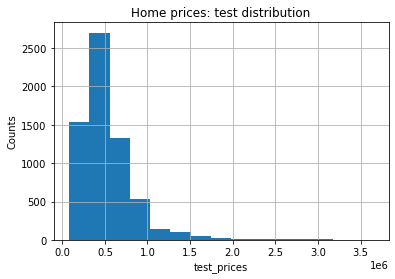

In [24]:

fig, ax = plt.subplots()
y_test.hist(bins = 15, ax = ax)
ax.set_xlabel('test_prices')
ax.set_ylabel('Counts')
ax.set_title('Home prices: test distribution')
plt.show()